# RNA STAR
Here we perform sequence alignments on the input FASTQ files. This produces `.sam` files.

In [ ]:
!apt install rna-star

# sambamba
Here we convert the `.sam` files to `.bam` files and sort them.

In [8]:
!# password.txt is a text file with your password.
!# If this gives an error (probably because you don't have sudo permissions),
!# try running apt install -y sambamba instead.
!sudo -S apt install -y sambamba < password.txt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libllvm11 libphobos2-ldc-shared98
The following NEW packages will be installed:
  libllvm11 libphobos2-ldc-shared98 sambamba
0 upgraded, 3 newly installed, 0 to remove and 1 not upgraded.
Need to get 21.8 MB of archives.
After this operation, 92.9 MB of additional disk space will be used.
Get:1 http://mirrors.ocf.berkeley.edu/ubuntu jammy/universe amd64 libllvm11 amd64 1:11.1.0-6 [19.6 MB]
Get:2 http://mirrors.ocf.berkeley.edu/ubuntu jammy/universe amd64 libphobos2-ldc-shared98 amd64 1:1.28.0-1ubuntu1 [1,487 kB]
Get:3 http://mirrors.ocf.berkeley.edu/ubuntu jammy/universe amd64 sambamba amd64 0.8.2+dfsg-2 [695 kB]
Fetched 21.8 MB in 1s (21.4 MB/s)m

78Selecting previously unselected package libllvm11:amd64.
(Reading database ... 414490 files and directories currently installed.)Reading database ... 65%(Reading database ... 70%(Reading 

In [12]:
%%bash

# note that bash scripts don't make output in Jupyter notebooks until they finish (sad!)

mkdir -p ./sorted_bam
for dir in results/*/; do
  echo dir $dir
  if [ -d "$dir" ]; then
    for subdir in "$dir"/*/; do
      subdir_name=$(basename "$subdir")
      if [ -f "$subdir/Aligned.out.sam" ]; then
        sam_file="$subdir/Aligned.out.sam"
        group="${dir:9:3}"
        short="${subdir_name:0:12}"
        output=$group-$short
        sambamba view -S --format=bam $sam_file | sambamba sort -n -o sorted_bam/${output}.bam /dev/stdin
      fi
    done
  fi
done


dir results/00MatrigelCoating/
dir results/00PLLCoating/
dir results/01agrin/
dir results/02PanLaminin/
dir results/03Laminin211/
dir results/04CollagenI/
dir results/_STARtmp/




sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)

    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)



sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021

    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)

    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)



sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)

    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)



sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021sambam

In [6]:
import pathlib
import os
import subprocess

pathlib.Path("sorted_bam").mkdir(exist_ok=True)
for folder in os.listdir("results"):
    folderpath = f"results/{folder}"
    if not os.path.isdir(folderpath):
        continue
    
    for subfolder in os.listdir(folderpath):
        subfolderpath = f"{folderpath}/{subfolder}"
        sam_file = f"{subfolderpath}/Aligned.out.sam"
        if os.path.isfile(sam_file):
            group = folder[9:12]
            short = subfolder[0:13]
            output = f"{group}-{short}"
            # run sambamba on the file and put it in sorted_bam
            subprocess.run(f"sambamba view -S --format=bam {sam_file} | sambamba sort -n -o sorted_bam/{output}.bam /dev/stdin", shell=True, check=True)
            print(f"Ran sambamba on {subfolderpath}/{sam_file}")


sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)


sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)



Ran sambamba on results/01agrin/lib103916_L2-ds.d1b626e6358749c5aa8c7a900453bf55/results/01agrin/lib103916_L2-ds.d1b626e6358749c5aa8c7a900453bf55/Aligned.out.sam



sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)


sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)



Ran sambamba on results/01agrin/lib103917_L1-ds.6cb7a56486a743aa97aef4b4492c71db/results/01agrin/lib103917_L1-ds.6cb7a56486a743aa97aef4b4492c71db/Aligned.out.sam



sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021

sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)

    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)



Ran sambamba on results/01agrin/lib103916_L1-ds.cf006f61b73c426b81c8530ea73ed130/results/01agrin/lib103916_L1-ds.cf006f61b73c426b81c8530ea73ed130/Aligned.out.sam



sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)


sambamba 0.8.2
 by Artem Tarasov and Pjotr Prins (C) 2012-2021
    LDC 1.28.0 / DMD v2.098.0 / LLVM13.0.0 / bootstrap LDC - the LLVM D compiler (1.28.0)



KeyboardInterrupt: 

# htseq-count
Here we get sequence counts, and store them in CSV files.

In [7]:
%%bash
prefixes=("0M" "0P" "1a" "2P" "3L" "4C")
for pre in "${prefixes[@]}"; do
  bam_files=()
  for bam in sorted_bam/"$pre"*.bam; do
    bam_files+=($bam)
  done
  echo counting ${bam_files[@]}
    htseq-count --format=bam --order=name --stranded=yes "${bam_files[@]}" Homo_sapiens.GRCh38.113.gtf > htseqModResults/"$pre"_output.csv
  echo output to htseqModResults/"$pre"_output.csv
done


sorting sorted_bam/1ag-lib103915_L1.bam ...
sorting sorted_bam/1ag-lib103915_L2.bam ...
sorting sorted_bam/1ag-lib103916_L1.bam ...
sorting sorted_bam/1ag-lib103916_L2.bam ...
sorting sorted_bam/1ag-lib103917_L1.bam ...
sorting sorted_bam/1ag-lib103917_L2.bam ...
output to htseqResults/1a_output.csv


100000 GFF lines processed.
200000 GFF lines processed.
300000 GFF lines processed.
400000 GFF lines processed.
500000 GFF lines processed.
600000 GFF lines processed.
700000 GFF lines processed.
800000 GFF lines processed.
900000 GFF lines processed.
1000000 GFF lines processed.
1100000 GFF lines processed.
1200000 GFF lines processed.
1300000 GFF lines processed.
1400000 GFF lines processed.
1500000 GFF lines processed.
1600000 GFF lines processed.
1700000 GFF lines processed.
1800000 GFF lines processed.
1900000 GFF lines processed.
2000000 GFF lines processed.
2100000 GFF lines processed.
2200000 GFF lines processed.
2300000 GFF lines processed.
2400000 GFF lines processed.
2500000 GFF lines processed.
2600000 GFF lines processed.
2700000 GFF lines processed.
2800000 GFF lines processed.
2900000 GFF lines processed.
3000000 GFF lines processed.
3100000 GFF lines processed.
3200000 GFF lines processed.
3300000 GFF lines processed.
3400000 GFF lines processed.
3500000 GFF lines proce

# DESeq 2
This is used to get differentially expressed genes.

In [1]:
import pandas as pd
import scanpy as sc
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from sanbomics.tools import id_map

In [2]:
def load_count_matrix():
    """
    Load, merge, and preprocess count files into a single count matrix.

    Returns:
    pd.DataFrame: A preprocessed count matrix with gene IDs as columns and sample names as rows,
                  ready for downstream analysis.
    """
    counts_files = {
        "0M": "htseqResults/0M_output.csv",
        "0P": "htseqResults/0P_output.csv",
        "1A": "htseqResults/1a_output.csv",
        "2P": "htseqResults/2P_output.csv",
        "3L": "htseqResults/3L_output.csv",
        "4C": "htseqResults/4C_output.csv",
    }

    # Initialize an empty DataFrame
    count_matrix = None

    # Process each file
    for sample, file_path in counts_files.items():
        # Read the file with tab-separated values
        df = pd.read_csv(file_path, sep="\t", header=None, names=["geneID", sample])

        # Merge all files into one count matrix
        if count_matrix is None:
            count_matrix = df
        else:
            count_matrix = pd.merge(count_matrix, df, on="geneID", how="outer")

    # Set the geneID column as the index
    count_matrix.set_index("geneID", inplace=True)

    # Replace NaN values with zeros (common for gene count data)
    count_matrix.fillna(0, inplace=True)

    # Filter out rows (genes) with zero counts across all samples
    count_matrix = count_matrix[count_matrix.sum(axis=1) > 0]

    count_matrix = count_matrix[count_matrix.index.str.startswith('E')]

    # Transpose the count matrix to match DESeq2 format (samples as rows, genes as columns)
    count_matrix = count_matrix.T

    return count_matrix

In [3]:
def run_combined_test(
    count_matrix, metadata, species='human'
):
    """
    Run DESeq2 differential expression test for the combined group (RS) against the control group.
    Includes gene mapping using Sanbomics.

    Parameters:
    - count_matrix (pd.DataFrame): Transposed count matrix with samples as rows and genes as columns.
    - control_label (str): The label for the control group in the metadata.
    - combined_label (str): The label for the combined treatment group in the metadata.
    - padj_thresh (float): Threshold for adjusted p-value to consider significance.
    - lfc_thresh (float): Threshold for log2 fold change to consider significance.
    - species (str): The species for the gene mapping (default is 'human').

    Returns:
    - pd.DataFrame: A DataFrame with significant results (with mapped symbols) for the combined test.
    """

    # Initialize DeseqDataSet
    dds = DeseqDataSet(counts=count_matrix, metadata=metadata, design_factors="Condition")
    dds.deseq2()

    # Normalize total counts in the AnnData object
    sc.pp.normalize_total(dds, target_sum=1e4)

    sc.tl.pca(dds)

    sc.pl.pca(dds, color = 'Condition', size = 200)

    # Run differential expression test for the combined group
    stat_res = DeseqStats(dds, contrast=('Condition', 'RS', 'C'))

    # Run Wald tests
    stat_res.summary()

    # Return results
    res = stat_res.results_df

    # Map gene IDs to symbols
    mapper = id_map(species=species)
    res['Symbol'] = res.index.map(mapper.mapper)

    return res


In [4]:
def run_individual_tests(
    count_matrix, treatments, metadata, species='human'
):
    """
    Run DESeq2 differential expression tests for individual treatments against the control group.
    Includes gene mapping using Sanbomics.

    Parameters:
    - count_matrix (pd.DataFrame): Transposed count matrix with samples as rows and genes as columns.
    - treatments (list): List of treatment labels to test against the control.
    - control_label (str): The label for the control group in the metadata.
    - padj_thresh (float): Threshold for adjusted p-value to consider significance.
    - lfc_thresh (float): Threshold for log2 fold change to consider significance.
    - species (str): The species for the gene mapping (default is 'human').

    Returns:
    - dict: A dictionary with treatment labels as keys and significant results (with mapped symbols) as DataFrames.
    """

    # Initialize DeseqDataSet
    dds = DeseqDataSet(counts=count_matrix, metadata=metadata, design_factors="Condition")
    dds.deseq2()

    # Normalize total counts in the AnnData object
    sc.pp.normalize_total(dds, target_sum=1e4)

    sc.tl.pca(dds)

    sc.pl.pca(dds, color = 'Condition', size = 200)

    results = {}  # Store results for each treatment
    mapper = id_map(species=species)  # Initialize gene ID mapper

    for treatment in treatments:
        # Run differential expression test for each treatment vs control
        stat_res = DeseqStats(dds, contrast=('Condition', treatment, 'C'))

        # Run Wald tests
        stat_res.summary()

        # Return results
        res = stat_res.results_df

        # Map gene IDs to symbols
        res['Symbol'] = res.index.map(mapper.mapper)

        # Save the results to the dictionary
        results[treatment] = res

    return results


## Load and observe data

In [ ]:
# Load the count matrix
count_matrix = load_count_matrix()

# Display the first few rows of the processed count matrix
print(count_matrix)

In [115]:
# create a metadata df for samples and conditions
metadata = pd.DataFrame(zip(count_matrix.index, ['C', 'C', 'RS', 'RS', 'RS', 'RS']), columns = ['Sample', 'Condition'])

metadata = metadata.set_index('Sample')
print(metadata)

       Condition
Sample          
0M             C
0P             C
1A            RS
2P            RS
3L            RS
4C            RS


In [119]:
# create a metadata df for samples and conditions
indTreatMetadata = pd.DataFrame(zip(count_matrix.index, ['C', 'C', '1A', '2P', '3L', '4C']), columns = ['Sample', 'Condition'])

indTreatMetadata = indTreatMetadata.set_index('Sample')
print(indTreatMetadata.head(6))

       Condition
Sample          
0M             C
0P             C
1A            1A
2P            2P
3L            3L
4C            4C


## Run all treatments against all controls

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 29.51 seconds.

Fitting dispersion trend curve...
... done in 1.38 seconds.

Fitting MAP dispersions...
... done in 31.48 seconds.

Fitting LFCs...
... done in 25.21 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



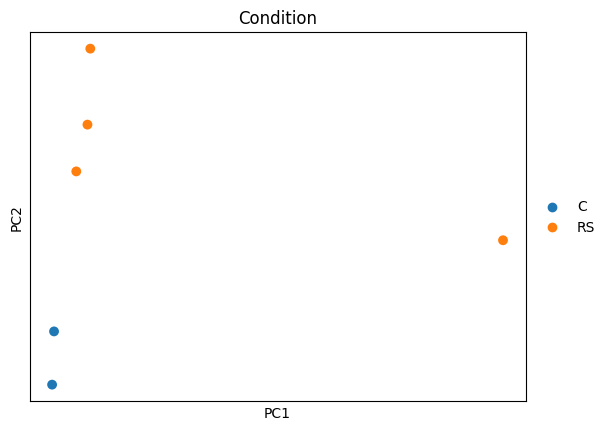

Running Wald tests...
... done in 7.61 seconds.



Log2 fold change & Wald test p-value: Condition RS vs C
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneID                                                                      
ENSG00000000003  122.089924        0.079993  0.235417  0.339792  0.734013   
ENSG00000000419  186.335951       -0.141822  0.216820 -0.654101  0.513047   
ENSG00000000457   22.572713        0.225161  0.481875  0.467261  0.640313   
ENSG00000000460   62.835468       -0.276412  0.279343 -0.989508  0.322415   
ENSG00000000938    0.304707        1.443372  4.468958  0.322977  0.746712   
...                     ...             ...       ...       ...       ...   
ENSG00000310523    0.903446        2.911071  3.339188  0.871790  0.383323   
ENSG00000310527    0.334816        1.546671  4.662615  0.331718  0.740103   
ENSG00000310532    0.167408        0.771330  4.803356  0.160581  0.872423   
ENSG00000310537    0.172429        0.771330  4.803356  0.160581  0.872423   
ENSG00000310539    0

In [111]:
# Run combined test
combined_results = run_combined_test(count_matrix, metadata)

In [117]:
# filter out values
combined_results = combined_results[combined_results.baseMean >= 10]

# Access combined test results
print(combined_results)

# Filter significant genes
sigs = combined_results[(combined_results['padj'] < 0.5) & (abs(combined_results['log2FoldChange']) > 2.0)]

print(sigs)

# Save results
#combined_results.to_csv("RS_vs_C_significant_genes.csv")


                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneID                                                                      
ENSG00000000003  122.089924        0.079993  0.235417  0.339792  0.734013   
ENSG00000000419  186.335951       -0.141822  0.216820 -0.654101  0.513047   
ENSG00000000457   22.572713        0.225161  0.481875  0.467261  0.640313   
ENSG00000000460   62.835468       -0.276412  0.279343 -0.989508  0.322415   
ENSG00000001036  223.518204       -0.006949  0.180606 -0.038478  0.969307   
...                     ...             ...       ...       ...       ...   
ENSG00000310385   36.231619       -0.014821  0.371207 -0.039927  0.968151   
ENSG00000310431   10.435667       -0.990067  0.729537 -1.357117  0.174744   
ENSG00000310441   30.178809        0.336015  0.426458  0.787921  0.430743   
ENSG00000310517  231.406618        0.175411  0.167736  1.045755  0.295674   
ENSG00000310521   16.187346        0.582236  0.586035  0.993517  0.320458   

## Run each treatment against all the controls

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.58 seconds.

Fitting dispersion trend curve...
... done in 0.79 seconds.

/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:497: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 28.41 seconds.

Fitting LFCs...
... done in 23.26 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



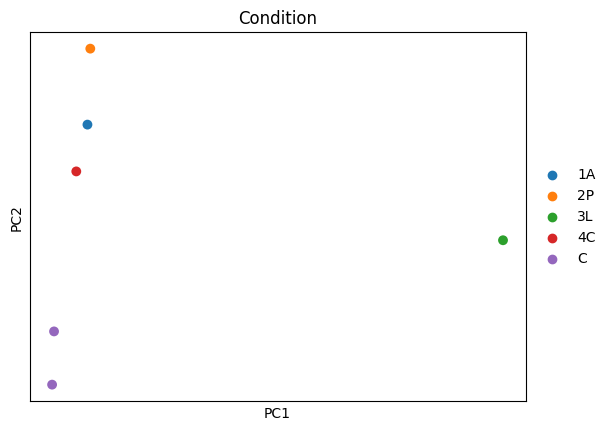

Running Wald tests...
... done in 6.13 seconds.



Log2 fold change & Wald test p-value: Condition 1A vs C
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneID                                                                      
ENSG00000000003  122.089924        0.422939  0.403215  1.048916  0.294217   
ENSG00000000419  186.335951        0.119526  0.339289  0.352285  0.724625   
ENSG00000000457   22.572713        0.109584  0.886316  0.123640  0.901601   
ENSG00000000460   62.835468       -0.430385  0.548798 -0.784231  0.432905   
ENSG00000000938    0.304707        2.544266  6.247868  0.407221  0.683845   
...                     ...             ...       ...       ...       ...   
ENSG00000310523    0.903446        0.101758  6.280527  0.016202  0.987073   
ENSG00000310527    0.334816        0.101736  6.947422  0.014644  0.988316   
ENSG00000310532    0.167408        0.101724  6.947428  0.014642  0.988318   
ENSG00000310537    0.172429        2.544239  6.247871  0.407217  0.683849   
ENSG00000310539    0

Running Wald tests...
... done in 8.45 seconds.



Log2 fold change & Wald test p-value: Condition 2P vs C
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneID                                                                      
ENSG00000000003  122.089924        0.074891  0.407199  0.183919  0.854077   
ENSG00000000419  186.335951       -0.068959  0.340854 -0.202312  0.839673   
ENSG00000000457   22.572713        0.318489  0.877325  0.363023  0.716588   
ENSG00000000460   62.835468       -0.390557  0.546729 -0.714351  0.475010   
ENSG00000000938    0.304707        0.059051  6.947795  0.008499  0.993219   
...                     ...             ...       ...       ...       ...   
ENSG00000310523    0.903446        4.086663  5.369149  0.761138  0.446575   
ENSG00000310527    0.334816        3.501695  6.164244  0.568066  0.569990   
ENSG00000310532    0.167408        2.501704  6.248084  0.400395  0.688865   
ENSG00000310537    0.172429        0.059051  6.947795  0.008499  0.993219   
ENSG00000310539    0

Running Wald tests...
... done in 5.77 seconds.



Log2 fold change & Wald test p-value: Condition 3L vs C
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneID                                                                      
ENSG00000000003  122.089924       -0.361927  0.408642 -0.885683  0.375788   
ENSG00000000419  186.335951       -0.753888  0.345216 -2.183818  0.028976   
ENSG00000000457   22.572713       -0.343233  0.889108 -0.386042  0.699466   
ENSG00000000460   62.835468       -0.181457  0.535458 -0.338883  0.734698   
ENSG00000000938    0.304707        2.161926  6.248076  0.346015  0.729332   
...                     ...             ...       ...       ...       ...   
ENSG00000310523    0.903446       -0.280755  6.280844 -0.044700  0.964346   
ENSG00000310527    0.334816       -0.280754  6.947814 -0.040409  0.967767   
ENSG00000310532    0.167408       -0.280754  6.947814 -0.040409  0.967767   
ENSG00000310537    0.172429       -0.280739  6.947793 -0.040407  0.967769   
ENSG00000310539    0

Running Wald tests...
... done in 8.61 seconds.



Log2 fold change & Wald test p-value: Condition 4C vs C
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneID                                                                      
ENSG00000000003  122.089924        0.107656  0.410745  0.262098  0.793246   
ENSG00000000419  186.335951        0.012525  0.343000  0.036516  0.970871   
ENSG00000000457   22.572713        0.690554  0.873803  0.790285  0.429361   
ENSG00000000460   62.835468       -0.129523  0.546729 -0.236906  0.812730   
ENSG00000000938    0.304707        0.320081  6.947797  0.046069  0.963255   
...                     ...             ...       ...       ...       ...   
ENSG00000310523    0.903446        3.762736  5.401356  0.696628  0.486036   
ENSG00000310527    0.334816        0.320066  6.947818  0.046067  0.963257   
ENSG00000310532    0.167408        0.320066  6.947818  0.046067  0.963257   
ENSG00000310537    0.172429        0.320081  6.947797  0.046069  0.963255   
ENSG00000310539    0

In [120]:
# Define treatments
treatments = ['1A', '2P', '3L', '4C']

# Run tests
individual_results = run_individual_tests(count_matrix, treatments, indTreatMetadata)

In [121]:
# Adjust as needed
padj = 0.5
logfold2 = 2.0

In [122]:
# 1A
oneA = individual_results['1A']
oneA = oneA[oneA.baseMean >= 10]
print(oneA)

# Filter significant genes
asigs = oneA[(oneA['padj'] < padj) & (abs(oneA['log2FoldChange']) > logfold2)]
print(asigs)

                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneID                                                                      
ENSG00000000003  122.089924        0.422939  0.403215  1.048916  0.294217   
ENSG00000000419  186.335951        0.119526  0.339289  0.352285  0.724625   
ENSG00000000457   22.572713        0.109584  0.886316  0.123640  0.901601   
ENSG00000000460   62.835468       -0.430385  0.548798 -0.784231  0.432905   
ENSG00000001036  223.518204       -0.078081  0.321366 -0.242968  0.808030   
...                     ...             ...       ...       ...       ...   
ENSG00000310385   36.231619        0.321907  0.694752  0.463341  0.643120   
ENSG00000310431   10.435667       -0.576514  1.319438 -0.436939  0.662156   
ENSG00000310441   30.178809        0.112838  0.783123  0.144087  0.885432   
ENSG00000310517  231.406618        0.319912  0.316512  1.010743  0.312140   
ENSG00000310521   16.187346        1.209728  1.020748  1.185138  0.235963   

In [123]:
# 2P
twoP = individual_results['2P']
twoP = twoP[twoP.baseMean >= 10]
print(twoP)

psigs = twoP[(twoP['padj'] < padj) & (abs(twoP['log2FoldChange']) > logfold2)]
print(psigs)

                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneID                                                                      
ENSG00000000003  122.089924        0.074891  0.407199  0.183919  0.854077   
ENSG00000000419  186.335951       -0.068959  0.340854 -0.202312  0.839673   
ENSG00000000457   22.572713        0.318489  0.877325  0.363023  0.716588   
ENSG00000000460   62.835468       -0.390557  0.546729 -0.714351  0.475010   
ENSG00000001036  223.518204        0.260500  0.317676  0.820018  0.412206   
...                     ...             ...       ...       ...       ...   
ENSG00000310385   36.231619       -0.225961  0.708885 -0.318756  0.749911   
ENSG00000310431   10.435667       -1.356111  1.371015 -0.989129  0.322600   
ENSG00000310441   30.178809        0.741581  0.764590  0.969907  0.332093   
ENSG00000310517  231.406618        0.288461  0.316413  0.911661  0.361947   
ENSG00000310521   16.187346        0.412209  1.046387  0.393935  0.693629   

In [124]:
# 3L
threeL = individual_results['3L']
threeL = threeL[threeL.baseMean >= 10]
print(threeL)

lsigs = threeL[(threeL['padj'] < padj) & (abs(threeL['log2FoldChange']) > logfold2)]
print(lsigs)

                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneID                                                                      
ENSG00000000003  122.089924       -0.361927  0.408642 -0.885683  0.375788   
ENSG00000000419  186.335951       -0.753888  0.345216 -2.183818  0.028976   
ENSG00000000457   22.572713       -0.343233  0.889108 -0.386042  0.699466   
ENSG00000000460   62.835468       -0.181457  0.535458 -0.338883  0.734698   
ENSG00000001036  223.518204       -0.307100  0.319768 -0.960383  0.336862   
...                     ...             ...       ...       ...       ...   
ENSG00000310385   36.231619       -0.198024  0.698148 -0.283641  0.776685   
ENSG00000310431   10.435667       -1.958939  1.396087 -1.403164  0.160568   
ENSG00000310441   30.178809        0.434954  0.763870  0.569408  0.569079   
ENSG00000310517  231.406618        0.106785  0.315092  0.338900  0.734685   
ENSG00000310521   16.187346       -0.120230  1.055230 -0.113937  0.909287   

In [125]:
# 4C
fourC = individual_results['4C']
fourC = fourC[fourC.baseMean >= 10]
print(fourC)

csigs = fourC[(fourC['padj'] < padj) & (abs(fourC['log2FoldChange']) > logfold2)]
print(csigs)

                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneID                                                                      
ENSG00000000003  122.089924        0.107656  0.410745  0.262098  0.793246   
ENSG00000000419  186.335951        0.012525  0.343000  0.036516  0.970871   
ENSG00000000457   22.572713        0.690554  0.873803  0.790285  0.429361   
ENSG00000000460   62.835468       -0.129523  0.546729 -0.236906  0.812730   
ENSG00000001036  223.518204        0.045800  0.322433  0.142045  0.887045   
...                     ...             ...       ...       ...       ...   
ENSG00000310385   36.231619       -0.012234  0.710462 -0.017220  0.986261   
ENSG00000310431   10.435667       -0.510116  1.328175 -0.384073  0.700925   
ENSG00000310441   30.178809       -0.175723  0.803579 -0.218675  0.826903   
ENSG00000310517  231.406618       -0.032686  0.322664 -0.101299  0.919313   
ENSG00000310521   16.187346        0.580132  1.050523  0.552232  0.580789   

# ChEA3
This script uses the ChEA3 API to perform transcription factor network analysis.

In [24]:
import csv
import requests

url = "https://maayanlab.cloud/chea3/api/enrich/"
gene_set = ["FOXM1","SMAD9","MYC","SMAD3","STAT1","STAT3"]
output_filename = "chea3_output.csv"

# Sends a JSON query to the ChEA3 API.
# https://maayanlab.cloud/chea3/
query_data = {
    "query_name":"myQuery", 
    "gene_set":gene_set
}
result = requests.post(url, json=query_data)
assert result.ok, f"Request failed with error code: {result.status_code}. Check the ChEA3 website to make sure the request was correct."

with open(output_filename, "w") as csvfile:
    # ChEA3 produces several tables (objects) in its JSON response.
    # we get items from the table with this name:
    entry = "ENCODE--ChIP-seq"
    tfs = result.json()[entry]

    # Each item in the tfs is a dict. We make the table header using its keys.
    fieldnames = tfs[0].keys()
    
    writer = csv.DictWriter(csvfile, fieldnames)
    writer.writeheader()
    for row in tfs:
        writer.writerow(row)

print(f"Finished writing results to {output_filename}")

Finished writing results to chea3_output.csv


In [21]:
# Print the result's data (warning: long)
# result.json()

# Print the result's text (JSON if successful, HTML if failure)
# result.text

# Step 6: Graph of transcription factors
Generates graphs for each control-treatment pair using an R program written by Randall J. Eck.

In [29]:
!pwd

!Rscript ./transcriptionFactors.R sample_ENCODE_ChIP-seq.tsv sample_ENCODE_ChIP-seq.png

/home/ahdog/Projects/csci597k_final_project

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

sample_ENCODE_ChIP-seq.tsv sample_ENCODE_ChIP-seq.png[1] "Reading from sample_ENCODE_ChIP-seq.tsv printing to sample_ENCODE_ChIP-seq.png"
Rows: 118 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Query Name, Set_name, TF, Library, Overlapping_Genes
dbl (7): Rank, Scaled Rank, Intersect, Set length, FET p-value, FDR, Odds Ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 
